In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


## Assignment 5 

In [73]:
df = pd.read_csv("material_data_Alankar.txt") 
  
# storing this dataframe in a csv file 
dataframe1.to_csv('material_data_Alankar.csv', index = None)

In [74]:
EN=df['Electronegativity']
Atomic_Radius=df['Atomic_Radius']
density=df['Density']
thermal_C=df['Thermal_Conductivity']

features = np.column_stack((EN,Atomic_Radius, density))
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

scaler = StandardScaler()
normalized_target = scaler.fit_transform(thermal_C.values.reshape(-1, 1))







In [75]:
X_train, X_test, y_train, y_test = train_test_split(
    normalized_features,normalized_target , test_size=0.05, random_state=0)

In [76]:
def relu(z): # takes a numpy array as input and returns activated array
    a = np.maximum(0,z)
    return a

In [77]:
def initialize_params(layer_sizes): #takes a list of the layer sizes as input and returns initialized parameters
    params = {}
    for i in range(1, len(layer_sizes)):
        params['W' + str(i)] = np.random.randn(layer_sizes[i], layer_sizes[i-1])*0.01
        # rand(d0,d1) will return an array of size d0 x d1.
        params['B' + str(i)] = np.random.randn(layer_sizes[i],1)*0.01
    return params

In [78]:
def compute_cost(values, Y_train): #takes true values and dictionary having activations of 
# all layers as input and returns cost
    layers = len(values)//2
    Y_pred = values['A' + str(layers)]
    cost = 1/(2*len(Y_train)) * np.sum(np.square(Y_pred - Y_train))
    return cost

In [79]:
def forward_propagation(X_train, params):
    #takes input training features and parameters as input and returns a dictionary 
# containining the numpy arrays of activations of all layers
    layers = len(params)//2
    values = {}
    for i in range(1, layers+1):
        if i==1: # transformation from input layer
            values['Z' + str(i)] = np.dot(params['W' + str(i)], X_train) + params['B' + str(i)]
            values['A' + str(i)] = relu(values['Z' + str(i)])
        else: # transformation from non-input layer
            values['Z' + str(i)] = np.dot(params['W' + str(i)], values['A' + str(i-1)]) + params['B' + str(i)]
            if i==layers: # Do not use activation function in the output layer
                values['A' + str(i)] = values['Z' + str(i)]
            else: # use activation function for non-output layers
                values['A' + str(i)] = relu(values['Z' + str(i)])
    return values

In [80]:
def backward_propagation(params, values, X_train, Y_train): 
    #takes parameters, activations, training set as input and returns gradients wrt parameters
    layers = len(params)//2
    m = len(Y_train)
    grads = {}
    for i in range(layers,0,-1):
        if i==layers:
            dA = 1/m * (values['A' + str(i)] - Y_train)
            dZ = dA
        else:
            dA = np.dot(params['W' + str(i+1)].T, dZ)
            dZ = np.multiply(dA, np.where(values['A' + str(i)]>=0, 1, 0))
        if i==1:
            grads['W' + str(i)] = 1/m * np.dot(dZ, X_train.T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
        else:
            grads['W' + str(i)] = 1/m * np.dot(dZ,values['A' + str(i-1)].T)
            grads['B' + str(i)] = 1/m * np.sum(dZ, axis=1, keepdims=True)
    return grads

In [81]:
def update_params(params, grads, learning_rate): 
    #takes parameters, gradients and learning rate as input and returns updated parameters
    layers = len(params)//2
    params_updated = {}
    for i in range(1,layers+1):
        params_updated['W' + str(i)] = params['W' + str(i)] - learning_rate * grads['W' + str(i)]
        params_updated['B' + str(i)] = params['B' + str(i)] - learning_rate * grads['B' + str(i)]
    return params_updated

In [82]:
def compute_accuracy(X_train, X_test, Y_train, Y_test, params): #compute accuracy on test and training data given learnt parameters
    values_train = forward_propagation(X_train.T, params)
    values_test = forward_propagation(X_test.T, params)
    train_acc = np.sqrt(mean_squared_error(Y_train, values_train['A' + str(len(layer_sizes)-1)].T))
    test_acc = np.sqrt(mean_squared_error(Y_test, values_test['A' + str(len(layer_sizes)-1)].T))
    return train_acc, test_acc

In [83]:
def predict(X, params):  #predict on new array X given learnt parameters
    values = forward_propagation(X.T, params)
    predictions = values['A' + str(len(values)//2)].T
    return predictions

In [84]:
def model(X_train, Y_train, layer_sizes, num_iters, learning_rate): #trains the model
    params = initialize_params(layer_sizes)
    for i in range(num_iters):
        values = forward_propagation(X_train.T, params)
        cost = compute_cost(values, Y_train.T)
        grads = backward_propagation(params, values,X_train.T, Y_train.T)
        params = update_params(params, grads, learning_rate)
        #print('Cost at iteration ' + str(i+1) + ' = ' + str(cost) + '\n')
    return params

In [85]:
layer_sizes=np.array([3,7,4,8,1])

In [86]:
params=model(X_train, y_train, layer_sizes, 1000, 0.01)

In [87]:
train_acc,test_acc=compute_accuracy(X_train, X_test, y_train, y_test, params)

In [88]:
train_acc

1.0142356019944945

In [89]:
test_acc

0.6956408821011179

### The RMSE error for training data is 1.0142356088990288

### The RMSE error for test data is  0.6956408701181552

In [90]:
Predicted_Thermal_C= predict(X_test, params)  #predict on new array X given learnt parameters


In [91]:
Predicted_Thermal_C

array([[0.00155144],
       [0.00155147],
       [0.00155147],
       [0.00155152],
       [0.00155147]])

In [92]:
unscaled_predicted = scaler.inverse_transform(Predicted_Thermal_C)
unscaled_y_test=scaler.inverse_transform(y_test)

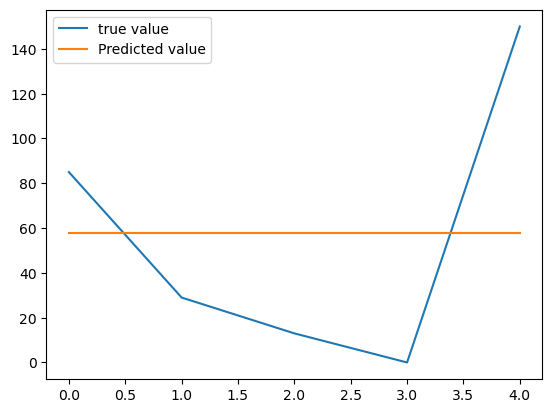

In [97]:
plt.plot(unscaled_y_test,label='true value')
plt.plot(unscaled_predicted,label='Predicted value')
plt.legend()
plt.show()


### Plot for Predicted thermal conductivity vs True thermal conductivity

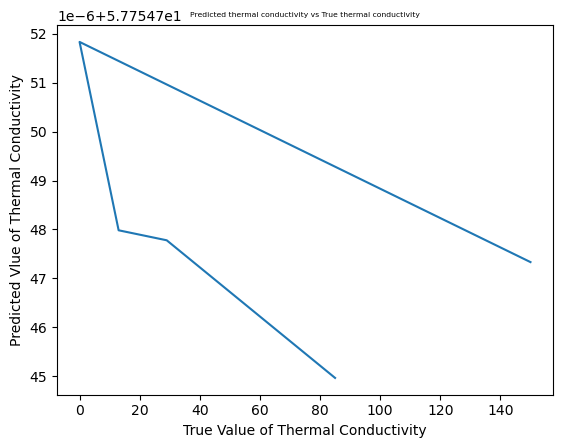

In [107]:
plt.plot(unscaled_y_test,unscaled_predicted)
plt.title('Predicted thermal conductivity vs True thermal conductivity',fontsize=5.5)
plt.xlabel('True Value of Thermal Conductivity')
plt.ylabel('Predicted Vlue of Thermal Conductivity')

plt.show()